In [379]:
import pandas as pd
import pandas_profiling


from matplotlib import style
from matplotlib import font_manager, rc

#모델링
from sklearn import model_selection

### 1. 데이터 불러오기

In [451]:
path = "C:\\Users\\user\\Documents\\카카오톡 받은 파일\\"
data = pd.read_csv(path+"bank.csv")
data.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

### 1-1. 판다스 프로파일링

In [352]:
pr=data.profile_report()
pr.to_file('pr_report.html')

<br>
<br>

### 2. EDA

### Data Info
<br>

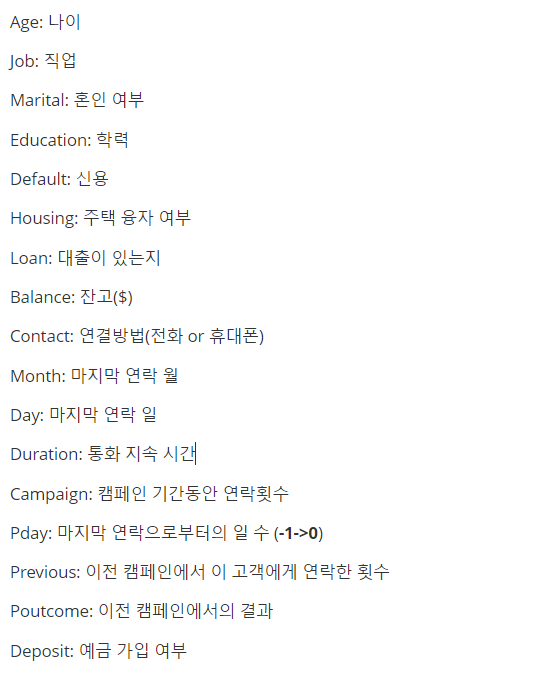

In [396]:
data.info()
# int64 와 object로 이루어져 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [105]:
data.dtypes
# int64 와 object로 이루어져 있음

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [246]:
# 결측치 확인
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [397]:
pr

# job 과 education의 상관관계 확인

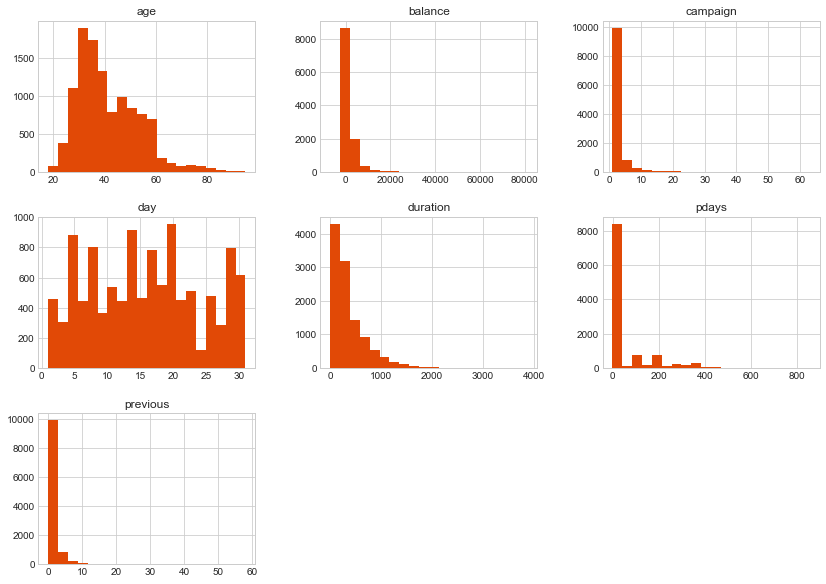

In [117]:
# 히스토그램을 통해 데이터 분포 확인

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

data.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

<br>

### deposit 비율 확인

In [340]:
data2 = data.copy()
data2.loc[(data2['deposit'] == 'yes'), "deposit" ] = 1
data2.loc[(data2['deposit'] == 'no'), "deposit" ] = 0

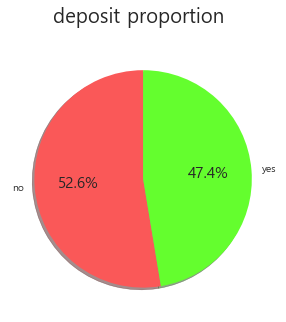

In [446]:
ratio = (data2.deposit.value_counts(1)*100).round(2).tolist()

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')

colors = ["#FA5858", "#64FE2E"]
labels = ['no', "yes"]
plt.figure(figsize=(5, 5))


plt.rcParams['font.size'] = 15.0
plt.suptitle('deposit proportion', fontsize=20)
plt.pie(ratio, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

In [412]:
pd.DataFrame(data2.groupby(["job"]).deposit.sum()).style.highlight_max()

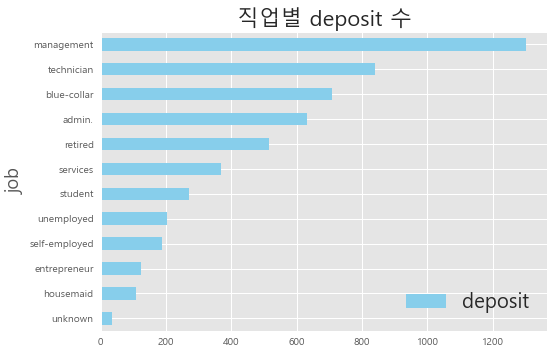

In [450]:
job_deposit = pd.DataFrame(data2.groupby(["job"]).deposit.sum())
job_deposit.sort_values(by='deposit', ascending=True).plot(kind='barh', title = '직업별 deposit 수', color = 'skyblue')

<br>
<br>

## 3. 데이터 전처리


### 3-1. target 변수 전처리

In [452]:
y_data = data[["deposit"]]

y_data.loc[(y_data['deposit'] == 'yes'), "deposit" ] = 1
y_data.loc[(y_data['deposit'] == 'no'), "deposit" ] = 0

<br>
<br>

### 3-2. 독립변수 전처리

In [453]:
x_data = data.copy()
del x_data["deposit"]
x_data.head(10)

age         job   marital  education default  balance housing loan  \
0   59      admin.   married  secondary      no     2343     yes   no   
1   56      admin.   married  secondary      no       45      no   no   
2   41  technician   married  secondary      no     1270     yes   no   
3   55    services   married  secondary      no     2476     yes   no   
4   54      admin.   married   tertiary      no      184      no   no   
5   42  management    single   tertiary      no        0     yes  yes   
6   56  management   married   tertiary      no      830     yes  yes   
7   60     retired  divorced  secondary      no      545     yes   no   
8   37  technician   married  secondary      no        1     yes   no   
9   28    services    single  secondary      no     5090     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome  
0  unknown    5   may      1042         1     -1         0  unknown  
1  unknown    5   may      1467         1     -1         0  unknown  
2  unknown    5   may      1389         1     -1         0  unknown  
3  unknown    5   may       579         1     -1         0  unknown  
4  unknown    5   may       673         2     -1         0  unknown  
5  unknown    5   may       562         2     -1         0  unknown  
6  unknown    6   may      1201         1     -1         0  unknown  
7  unknown    6   may      1030         1     -1         0  unknown  
8  unknown    6   may       608         1     -1         0  unknown  
9  unknown    6   may      1297         3     -1         0  unknown

<br>
<br>

### 3-3. x_data : 데이터 범주화

<br>

#### 바꿔야할 변수: age
<br>

**히스토그램을 통해서 age 분포 확인**

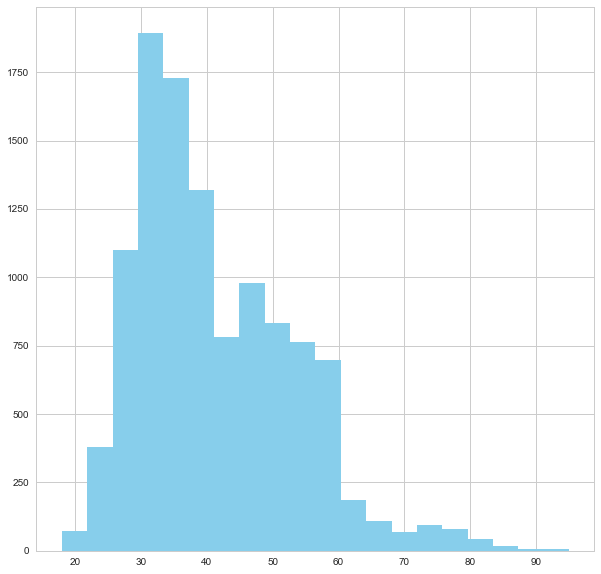

In [454]:
plt.style.use('seaborn-whitegrid')

data["age"].hist(bins = 20, figsize=(10,10), color = 'skyblue')
plt.show()

In [455]:
# 데이터 범주화
x_data.loc[(x_data['age'] < 20), "age_group" ] = 1 # 20 대 미만
x_data.loc[((x_data['age'] >= 20) & (x_data['age'] < 30)), "age_group" ] = 2 # 20대
x_data.loc[((x_data['age'] >= 30) & (x_data['age'] < 35)), "age_group" ] = 3 # 30-34
x_data.loc[((x_data['age'] >= 35) & (x_data['age'] < 40)), "age_group" ] = 4 #  35-39
x_data.loc[((x_data['age'] >= 40) & (x_data['age'] < 50)), "age_group" ] = 5 # 40대
x_data.loc[((x_data['age'] >= 50) & (x_data['age'] < 60)), "age_group" ] = 6 # 50대
x_data.loc[(x_data['age'] >= 60), "age_group" ] = 7 # 60대

In [456]:
pd.DataFrame(x_data["age_group"].value_counts())

age_group
5.0       2628
3.0       2359
4.0       1959
6.0       1885
2.0       1530
7.0        780
1.0         21

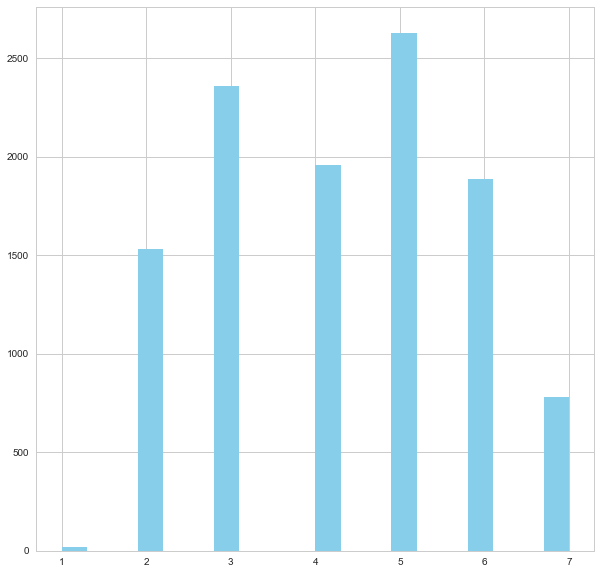

In [457]:
plt.style.use('seaborn-whitegrid')

x_data["age_group"].hist(bins = 20, figsize=(10,10), color = 'skyblue')
plt.show()

### 3-4. x_data : 문자열 -> 숫자로 변경
<br>

#### 바꿔야할 변수: job, marital, education, default, housing, loan, contact, month, poutcome

In [458]:
def uni_list(change_col):
    return x_data[change_col].unique().tolist()

In [459]:
# 함수화해서 바꾸기
def total_change(change_col):
    uni_list = x_data[change_col].unique().tolist()
    for i in range(len(uni_list)):
        x_data.loc[(x_data[change_col] == uni_list[i]), change_col+"_group"] = i+1        

In [460]:
# 1. job
total_change('job')
print(uni_list('job'))
x_data["job_group"].value_counts()

['admin.', 'technician', 'services', 'management', 'retired', 'blue-collar', 'unemployed', 'entrepreneur', 'housemaid', 'unknown', 'self-employed', 'student']


4.0     2566
6.0     1944
2.0     1823
1.0     1334
3.0      923
5.0      778
11.0     405
12.0     360
7.0      357
8.0      328
9.0      274
10.0      70
Name: job_group, dtype: int64

<BarContainer object of 12 artists>

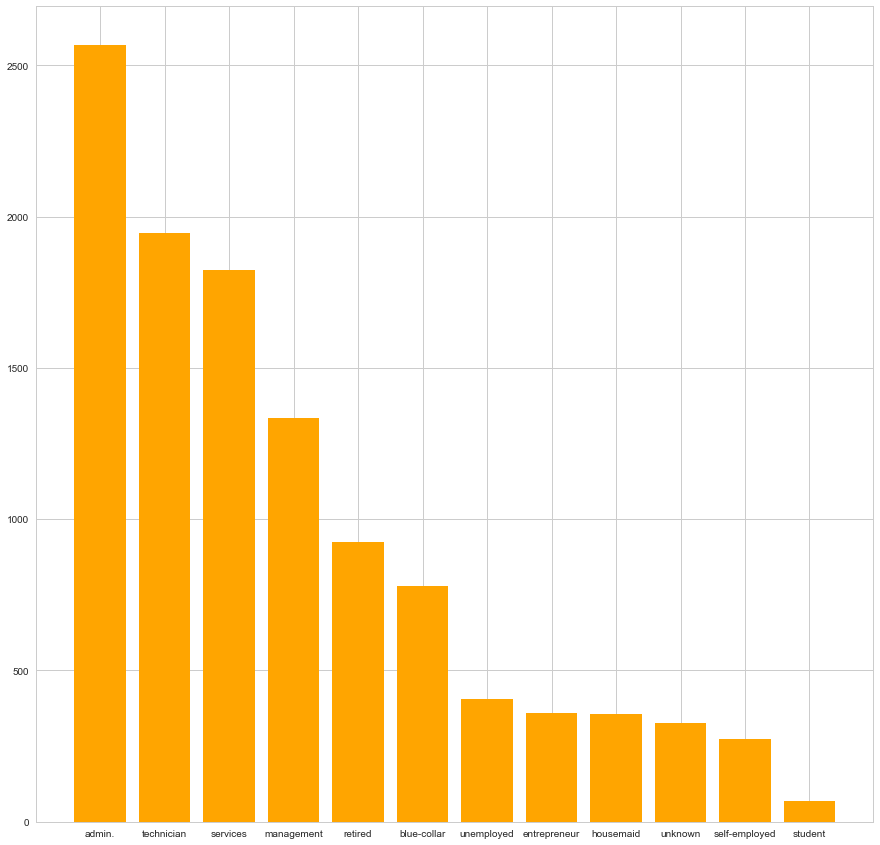

In [461]:
plt.figure(figsize=(15, 15))
plt.bar(x_data["job"].unique().tolist(), x_data["job"].value_counts().tolist(), color = "orange")

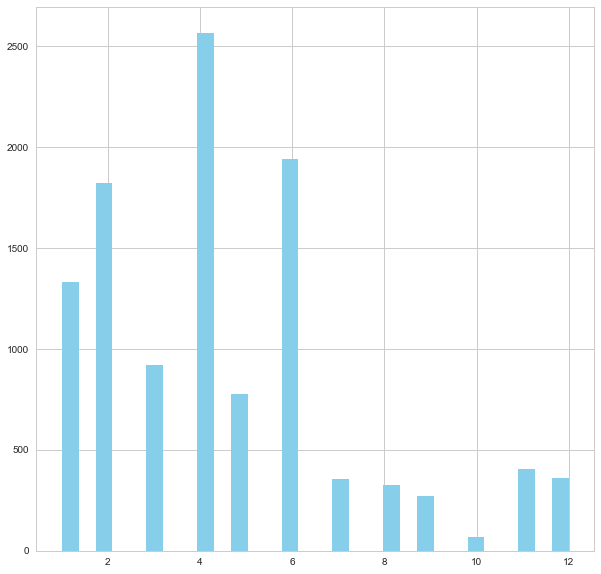

In [462]:
plt.style.use('seaborn-whitegrid')

x_data["job_group"].hist(bins = 30, figsize=(10,10), color = 'skyblue')
plt.show()

In [463]:
# 2. marital
total_change('marital')
x_data["marital_group"].head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: marital_group, dtype: float64

In [464]:
# 3. education
total_change('education')
x_data["education_group"].head()

0    1.0
1    1.0
2    1.0
3    1.0
4    2.0
Name: education_group, dtype: float64

In [465]:
# 4. default
total_change('default')
x_data['default_group'].head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: default_group, dtype: float64

In [466]:
# 5. housing
total_change('housing')
x_data['housing_group'].head()

0    1.0
1    2.0
2    1.0
3    1.0
4    2.0
Name: housing_group, dtype: float64

In [467]:
# 6. loan
total_change('loan')
x_data['loan_group'].head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: loan_group, dtype: float64

In [468]:
# 7. contact
total_change('contact')
x_data['contact_group'].head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: contact_group, dtype: float64

In [469]:
# 8. month
total_change('month')
x_data['month_group'].head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: month_group, dtype: float64

In [470]:
# 9. poutcome
total_change('poutcome')
x_data['poutcome_group'].head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: poutcome_group, dtype: float64

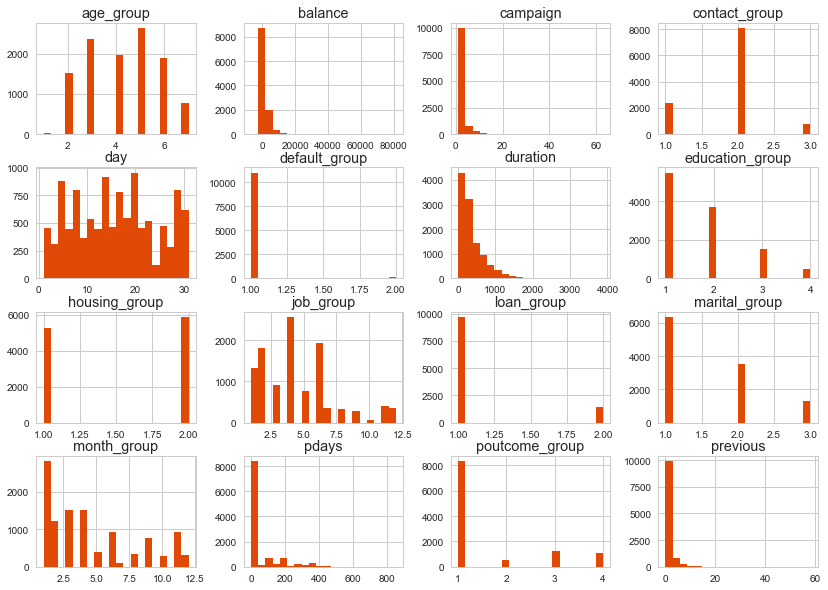

In [487]:
# 히스토그램을 통해 데이터 분포 확인
# int형으로 치환한 모든 변수 분포 확인 가능

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 10.0
plt.style.use('seaborn-whitegrid')

x_data.hist(bins=20, figsize=(14,10), color='#E14906')
plt.show()

<br>
<br>

### 3-5. 불필요한 변수 삭제

In [474]:
del_cols = ["age", "job","marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"]

x_data.drop(labels = del_cols, axis = 1, inplace = True)
x_data.head()

balance  day  duration  campaign  pdays  previous  age_group  job_group  \
0     2343    5      1042         1     -1         0        6.0        1.0   
1       45    5      1467         1     -1         0        6.0        1.0   
2     1270    5      1389         1     -1         0        5.0        2.0   
3     2476    5       579         1     -1         0        6.0        3.0   
4      184    5       673         2     -1         0        6.0        1.0   

   marital_group  education_group  default_group  housing_group  loan_group  \
0            1.0              1.0            1.0            1.0         1.0   
1            1.0              1.0            1.0            2.0         1.0   
2            1.0              1.0            1.0            1.0         1.0   
3            1.0              1.0            1.0            1.0         1.0   
4            1.0              2.0            1.0            2.0         1.0   

   contact_group  month_group  poutcome_group  
0            1.0          1.0             1.0  
1            1.0          1.0             1.0  
2            1.0          1.0             1.0  
3            1.0          1.0             1.0  
4            1.0          1.0             1.0

<br>
<br>

## 4. test x , test y,  train x, train y 데이터 분리

In [477]:
from sklearn import model_selection

train_data, test_data, train_label, test_label = model_selection.train_test_split(x_data, y_data,
                                                                                 test_size=0.3,
                                                                                 random_state=0)
print(train_data.shape)
print(test_data.shape)
print(train_label.shape)
print(test_label.shape)

(7813, 16)
(3349, 16)
(7813, 1)
(3349, 1)


In [478]:
train_data.head()

balance  day  duration  campaign  pdays  previous  age_group  job_group  \
2265     1662    4        94         2     -1         0        6.0        1.0   
1525    -3058   17       882         3     -1         0        4.0       11.0   
1837     3025    7       476         1    352         1        6.0        1.0   
9423      -87   13       531         1     -1         0        4.0        3.0   
8111      205   18       176         4     -1         0        4.0        9.0   

      marital_group  education_group  default_group  housing_group  \
2265            1.0              1.0            1.0            2.0   
1525            1.0              2.0            1.0            1.0   
1837            1.0              1.0            1.0            2.0   
9423            2.0              3.0            1.0            1.0   
8111            1.0              1.0            1.0            1.0   

      loan_group  contact_group  month_group  poutcome_group  
2265         1.0            2.0          2.0             1.0  
1525         2.0            2.0         11.0             1.0  
1837         1.0            2.0          1.0             2.0  
9423         1.0            2.0          1.0             1.0  
8111         1.0            3.0          6.0             1.0

<br>

## 5. Change normal labels to one-hot labels

In [479]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(categories='auto')

enc.fit(train_label)
train_label = enc.transform(train_label).toarray()

enc.fit(test_label)
test_label = enc.transform(test_label).toarray()

print(train_label.shape)
print(test_label.shape)

(7813, 2)
(3349, 2)


<br>

## 6. Build & Train the model 

In [480]:
import tensorflow as tf
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

import os
tf.logging.set_verbosity(tf.logging.ERROR)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

In [481]:
model = models.Sequential() 

model.add(layers.Dense(input_dim=len(train_data.columns.tolist()), units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization()) # Use this line as if needed
model.add(layers.Activation('elu')) # layers.ELU or layers.LeakyReLU

model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu')) 

model.add(layers.Dense(units=512, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu'))

model.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.Activation('elu')) 
model.add(layers.Dropout(rate=0.5))

model.add(layers.Dense(units=2, activation='softmax')) # One-hot vector for 0 & 1

In [482]:
model.compile(optimizer=optimizers.Adam(), 
              loss=losses.categorical_crossentropy, 
              metrics=[metrics.categorical_accuracy]) 

In [483]:
history = model.fit(train_data, train_label, batch_size=100, epochs=20, validation_split=0.3) 

Train on 5469 samples, validate on 2344 samples
Epoch 1/20
5469/5469 [==============================] - 2s 290us/sample - loss: 0.9187 - categorical_accuracy: 0.6734 - val_loss: 0.7099 - val_categorical_accuracy: 0.6672
Epoch 2/20
5469/5469 [==============================] - 1s 112us/sample - loss: 0.6381 - categorical_accuracy: 0.7095 - val_loss: 0.6115 - val_categorical_accuracy: 0.7031
Epoch 3/20
5469/5469 [==============================] - 1s 112us/sample - loss: 0.5749 - categorical_accuracy: 0.7246 - val_loss: 0.5901 - val_categorical_accuracy: 0.7355
Epoch 4/20
5469/5469 [==============================] - 1s 112us/sample - loss: 0.5754 - categorical_accuracy: 0.7263 - val_loss: 0.5465 - val_categorical_accuracy: 0.7359
Epoch 5/20
5469/5469 [==============================] - 1s 114us/sample - loss: 0.5446 - categorical_accuracy: 0.7460 - val_loss: 0.4922 - val_categorical_accuracy: 0.7585
Epoch 6/20
5469/5469 [==============================] - 1s 115us/sample - loss: 0.5198 - cat

In [484]:
result = model.evaluate(test_data, test_label, batch_size=100)

print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

3349/3349 [==============================] - 0s 36us/sample - loss: 0.4475 - categorical_accuracy: 0.7925
loss (cross-entropy) : 0.4475232905311419
test accuracy : 0.79247534


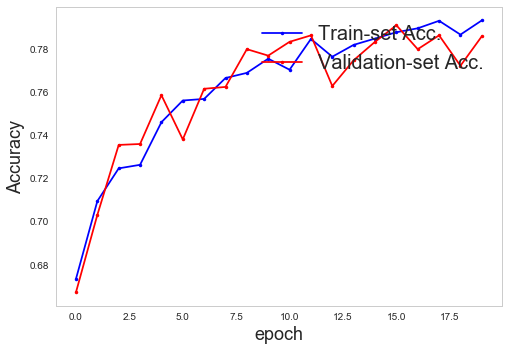

In [485]:
val_acc = history.history['val_categorical_accuracy']
acc = history.history['categorical_accuracy']

import numpy as np
import matplotlib.pyplot as plt

x_len = np.arange(len(acc))
plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()

In [486]:
# Prediction on test data
np.argmax(model.predict(test_data), axis=1)

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)